# 11_AugModels (Stage 2 Model development 50 Epochs)

Written by: Rupesh Kumar Dey

Dataset: Augmented Dataset (Dataset Set 5)

Notebook used for model development and testing for AugModels (50  Epochs)

## Importing required Libraries

In [1]:
!pip install tensorflow_hub
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 16.1 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 24.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - AugModels (50 epochs)

#### Dataset Loading 

### 11_BaseModel1_CLAHE: Base Model 1

#### Dataset Loading 

In [3]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [4]:
# Create and Train Model and train
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
BaseModel1_CLAHE.summary()
checkpointPath = "TrainedResultsAug/11_BaseModel1_CLAHE/checkpoint/11_BaseModel1_CLAHE.ckpt"
BaseModel1_CLAHE_history = trainModel(BaseModel1_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-29 23:31:40.566573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 23:31:40.843064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 23:31:40.843509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 23:31:40.845589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 23:31:40.845970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 16)        1168  

2022-08-29 23:31:48.941945: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 1.4337 - accuracy: 0.9332 - recall: 0.9326
Epoch 00001: val_accuracy improved from -inf to 0.88021, saving model to TrainedResultsAug/11_BaseModel1_CLAHE/checkpoint/11_BaseModel1_CLAHE.ckpt
525/525 [==============================] - 136s 246ms/step - loss: 1.4337 - accuracy: 0.9332 - recall: 0.9326 - val_loss: 0.3951 - val_accuracy: 0.8802 - val_recall: 0.8802
Epoch 2/50
525/525 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9914 - recall: 0.9912
Epoch 00002: val_accuracy did not improve from 0.88021
525/525 [==============================] - 81s 154ms/step - loss: 0.0245 - accuracy: 0.9914 - recall: 0.9912 - val_loss: 0.3810 - val_accuracy: 0.8698 - val_recall: 0.8698
Epoch 3/50
525/525 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9986 - recall: 0.9985
Epoch 00003: val_accuracy did not improve from 0.88021
525/525 [==============================] - 81s 154ms/step - loss: 0.00

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 7ms/step
Confusion Matrix:


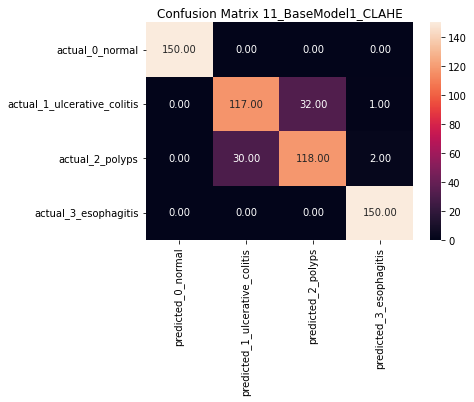

In [5]:
# Load best model from checkpoint folder and generate results. 
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_BaseModel1_CLAHE/checkpoint/11_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE, test_data, "11_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_BaseModel1_CLAHE/results/confusionMatrix/11_BaseModel1_CLAHE.jpg")

2022-08-30 00:41:26.844145: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://422ec4c7-4b29-44c9-a7a8-f5114ba289e6/assets


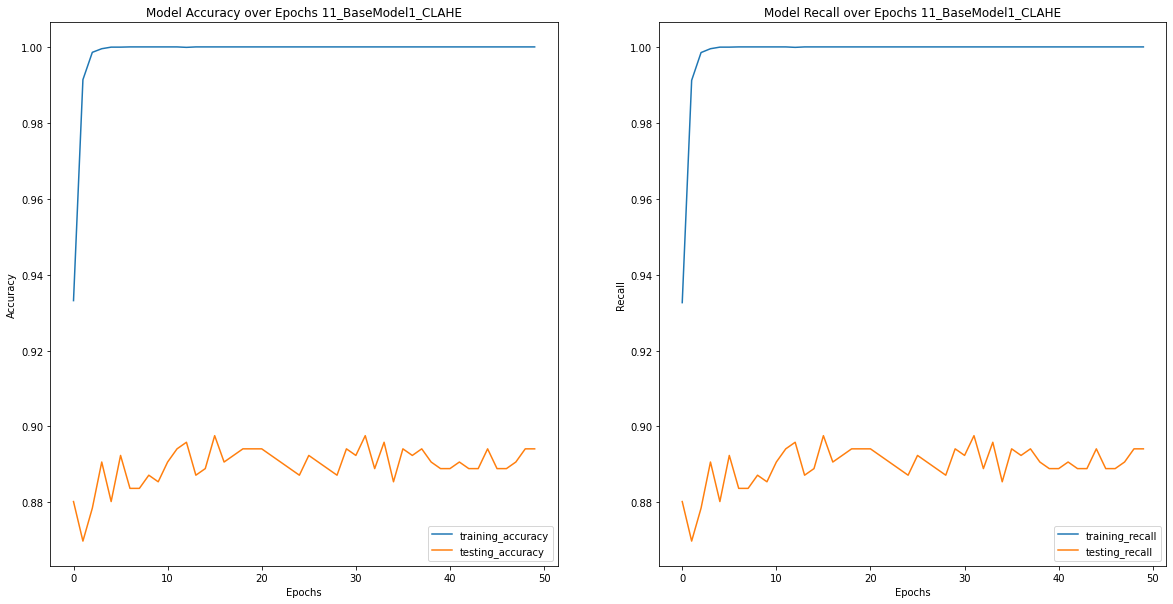

In [6]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_BaseModel1_CLAHE/results/classificationReport/11_BaseModel1_CLAHE.csv")
historyPath = "TrainedResultsAug/11_BaseModel1_CLAHE/history/11_BaseModel1_CLAHE.npy"
save_history1(BaseModel1_CLAHE_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_BaseModel1_CLAHE", location = "TrainedResultsAug/11_BaseModel1_CLAHE/history/11_BaseModel1_CLAHE.jpg")

### 11_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [7]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [8]:
# Create and Train Model and train
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
BaseModel2_MULTISCALE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
BaseModel2_MULTISCALE_tunedAdamLrScheduler_history = trainModelLrScheduler(BaseModel2_MULTISCALE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50, epochCutOff = 25, reductionRatio = 2)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 55, 55, 16)        1281

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 8ms/step
Confusion Matrix:


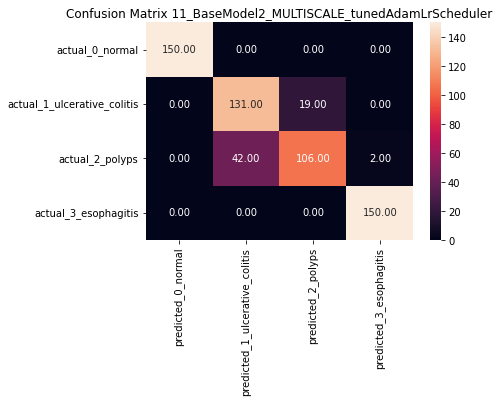

In [9]:
# Load best model from checkpoint folder and generate results. 
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "11_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://5ad28094-7694-41f8-8bf5-f21f934afebb/assets
DONE


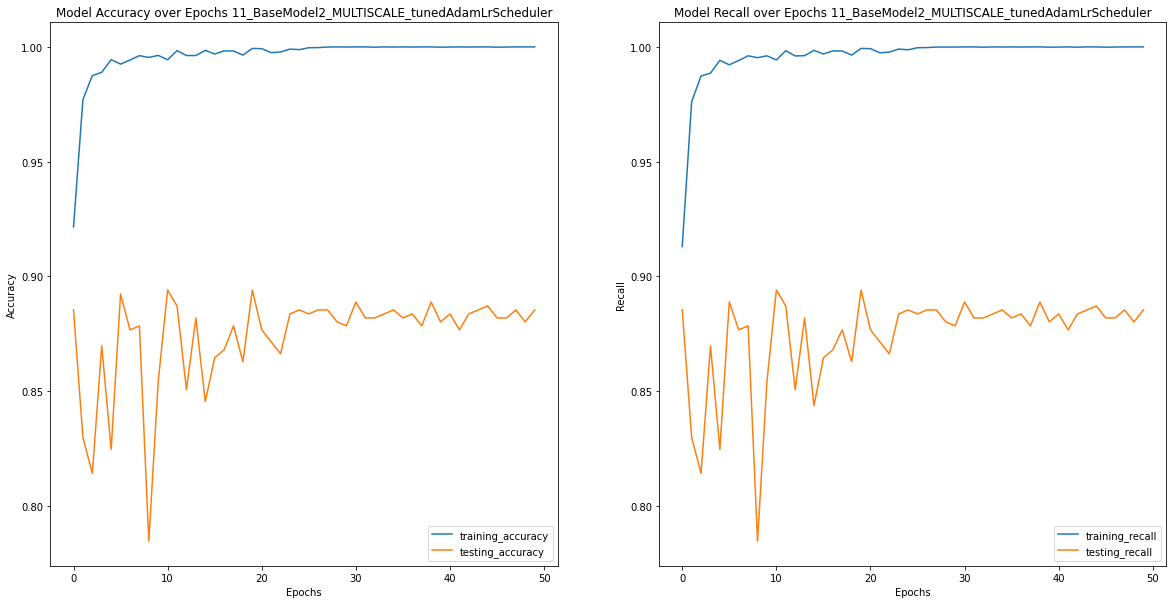

In [10]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.npy"
save_history1(BaseModel2_MULTISCALE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_BaseModel2_MULTISCALE_tunedAdamLrScheduler", location = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")
print("DONE")

### 11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdam: Transfer Learning with ResNet50V1 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [11]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [12]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

102981632/102967424 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_20 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_21 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


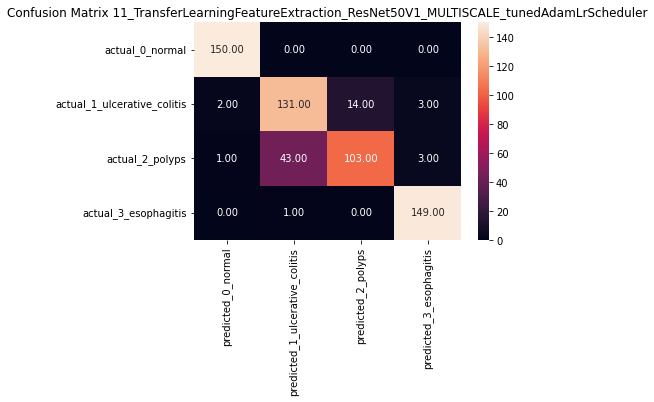

In [13]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, test_data, "11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://b20d6098-f783-4700-9709-46a7d5dc982d/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


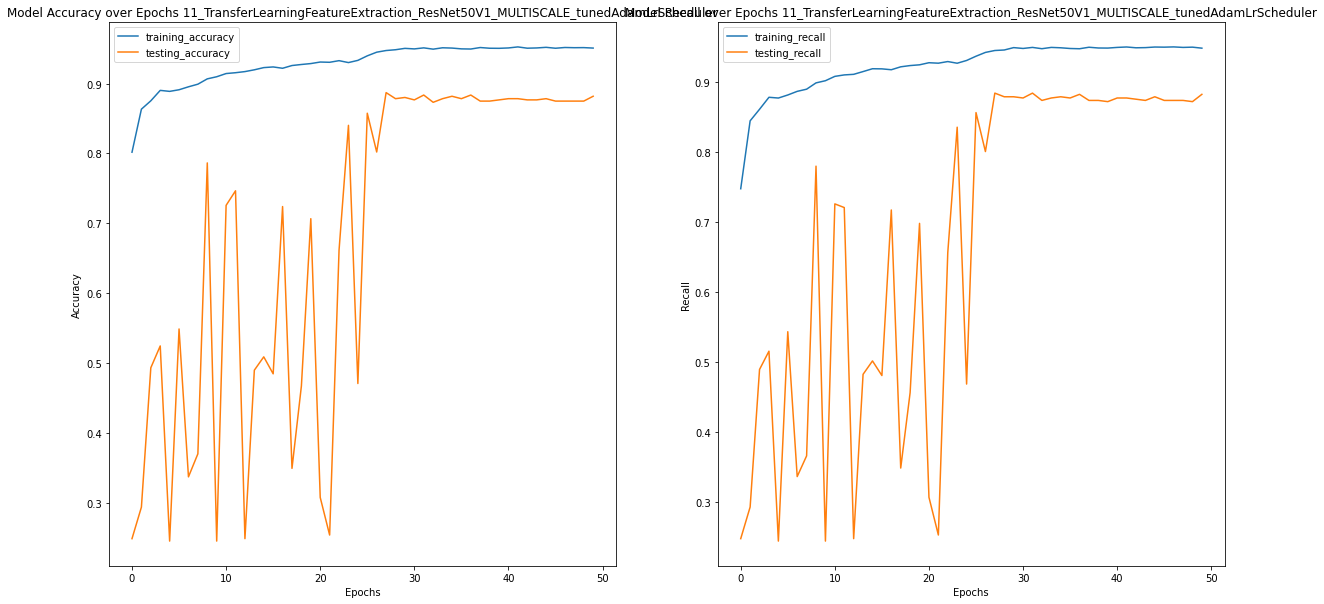

In [14]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler", location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")

### 11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model (Optimizer - Adam + LrScheduler)

In [15]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [16]:
# Create Res Net 50 V2 and train
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

102883328/102869336 [==============================] - 2s 0us/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_26 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_27 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


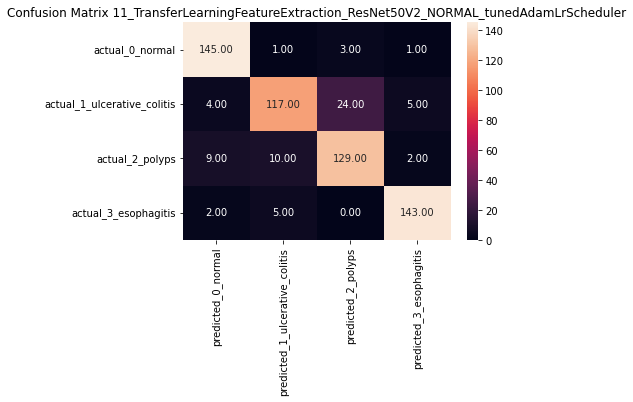

In [17]:
# Load best model and generate results. 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://2b42ffee-c395-4291-98ea-554d2811ad0c/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


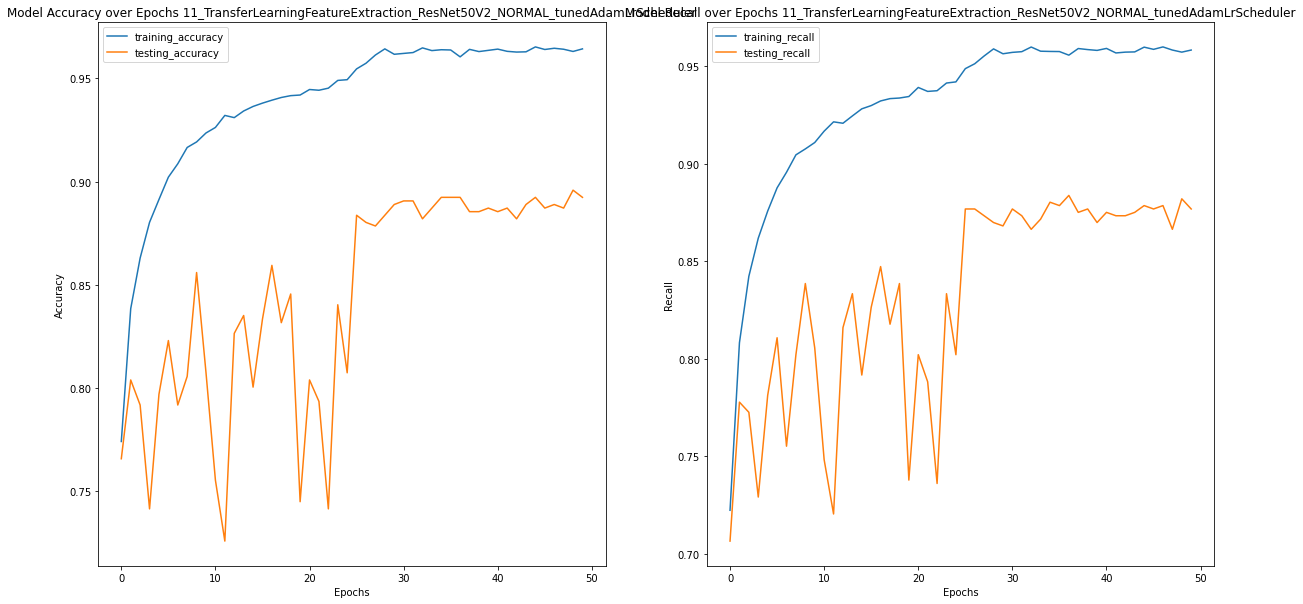

In [18]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler", location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")

### 11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create MobileNetV1 and train
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-30 06:15:10.032074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 06:15:10.214250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 06:15:10.214762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 06:15:10.216714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 06:15:10.217082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                              

2022-08-30 06:15:19.588548: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8360 - recall: 0.8042
Epoch 00001: val_accuracy improved from -inf to 0.76215, saving model to TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt
525/525 [==============================] - 171s 313ms/step - loss: 0.4390 - accuracy: 0.8360 - recall: 0.8042 - val_loss: 0.6072 - val_accuracy: 0.7622 - val_recall: 0.7031 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
525/525 [==============================] - ETA: 0s - loss: 0.2702 - accuracy: 0.9002 - recall: 0.8895
Epoch 00002: val_accuracy improved from 0.76215 to 0.87153, saving model to TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrSched

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 7s 11ms/step
Confusion Matrix:


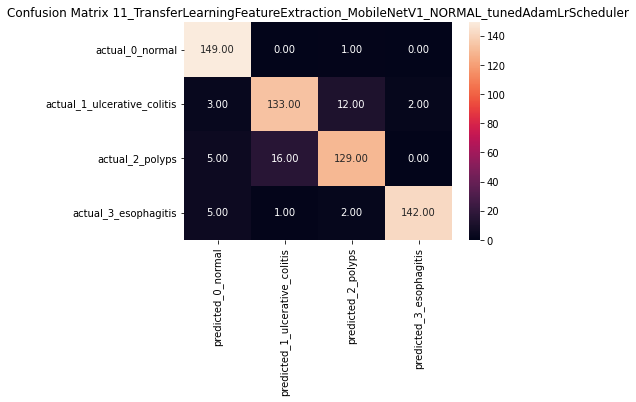

In [6]:
# Load best model and generate results. 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")

2022-08-30 07:47:43.212489: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://68a2c6a8-5b9a-4a0c-87ed-00927ae4a610/assets


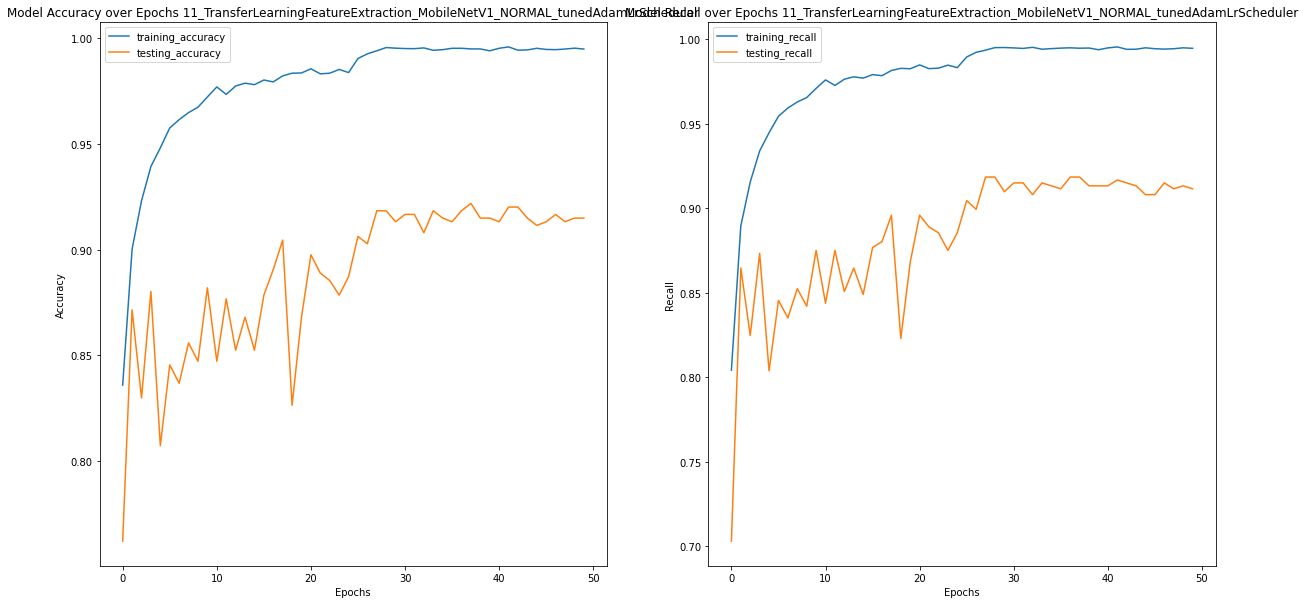

In [7]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler", location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")

### 11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE: Transfer Learning with MobileNetV2 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create MobileNetV2 and train
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

14548992/14536120 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                            

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 10s 14ms/step
Confusion Matrix:


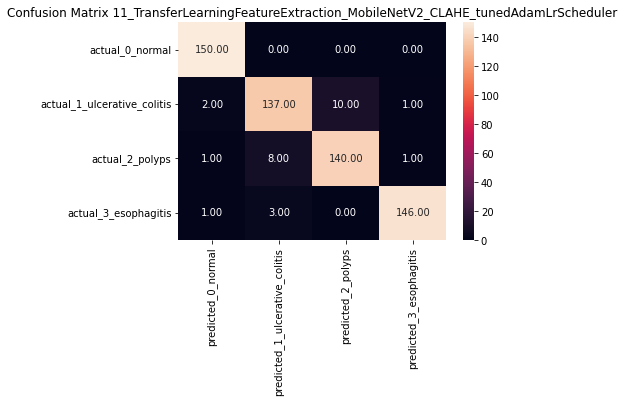

In [10]:
# Load best model from checkpoint folder and generate results.
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"

loadModel(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, test_data, "11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")




INFO:tensorflow:Assets written to: ram://d6134b75-e60b-4460-984d-7590675922d3/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


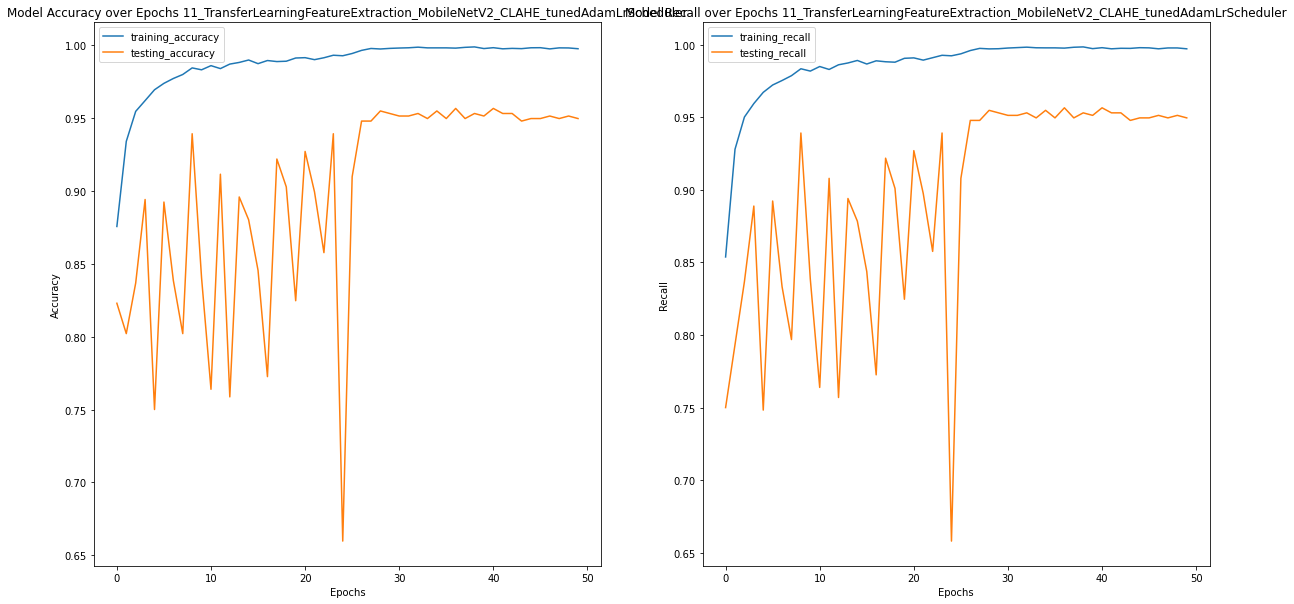

In [11]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/classificationReport/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler", location = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/history/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")

### 11_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

102981632/102967424 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 10s 15ms/step
Confusion Matrix:


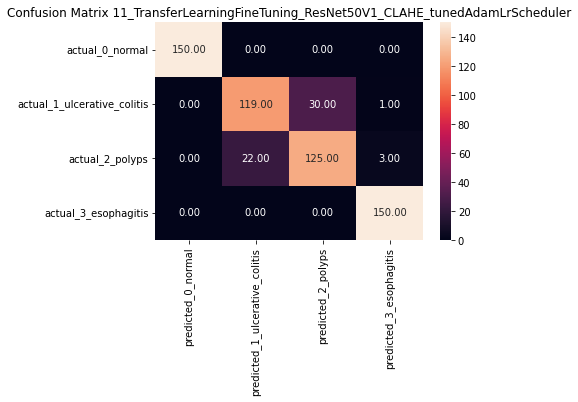

In [14]:
# Load best model from checkpoint folder and generate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://37342948-6c62-4dc7-88c7-e2a95395c501/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


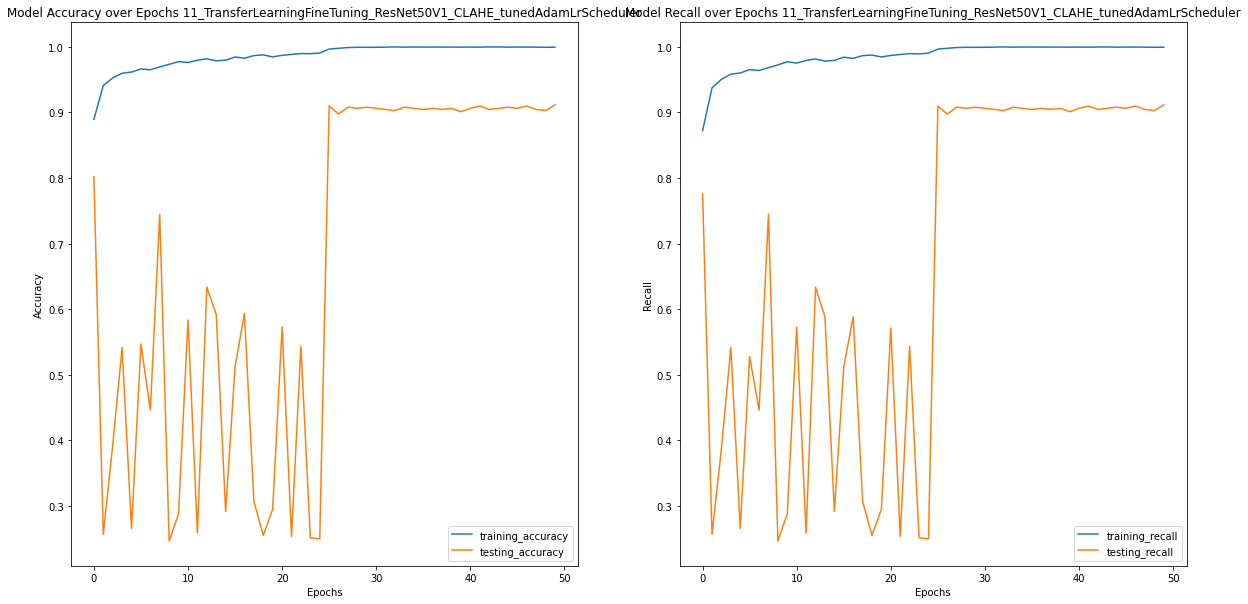

In [15]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler", location = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")

### 11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create Res Net 50 V2 and train
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V2_RAYLEIGH.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
TransferLearningFineTuning_ResNet50V2_RAYLEIGH_history = trainModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-30 13:34:45.310958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 13:34:45.449368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 13:34:45.449803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 13:34:45.451655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 13:34:45.452044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102883328/102869336 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-30 13:34:59.523496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.7382 - accuracy: 0.7144 - recall: 0.6250
Epoch 00001: val_accuracy improved from -inf to 0.72049, saving model to TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt
525/525 [==============================] - 167s 306ms/step - loss: 0.7382 - accuracy: 0.7144 - recall: 0.6250 - val_loss: 0.7246 - val_accuracy: 0.7205 - val_recall: 0.6094
Epoch 2/50
525/525 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.7833 - recall: 0.7337- ETA: 8s -
Epoch 00002: val_accuracy improved from 0.72049 to 0.72569, saving model to TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt
525/525 [==============================] - 101s 192ms/step - loss: 0.5570 - accuracy: 0.7833 - recall: 0.7337 - val_loss: 0.7379 - val_accuracy: 0.7257 - val_recall: 0.6632
Epoch 3/50


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


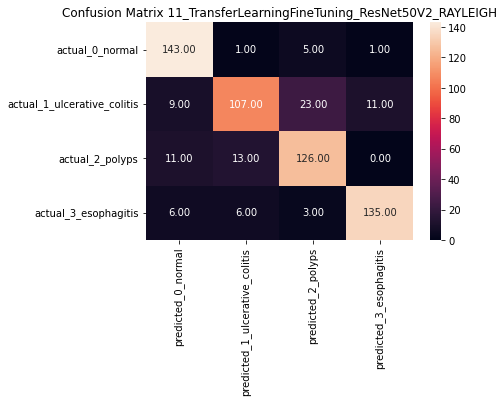

In [6]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, test_data, "11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/confusionMatrix/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")

2022-08-30 15:07:23.742542: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://b8cf5d8b-d623-418a-a8dd-cbc313168589/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


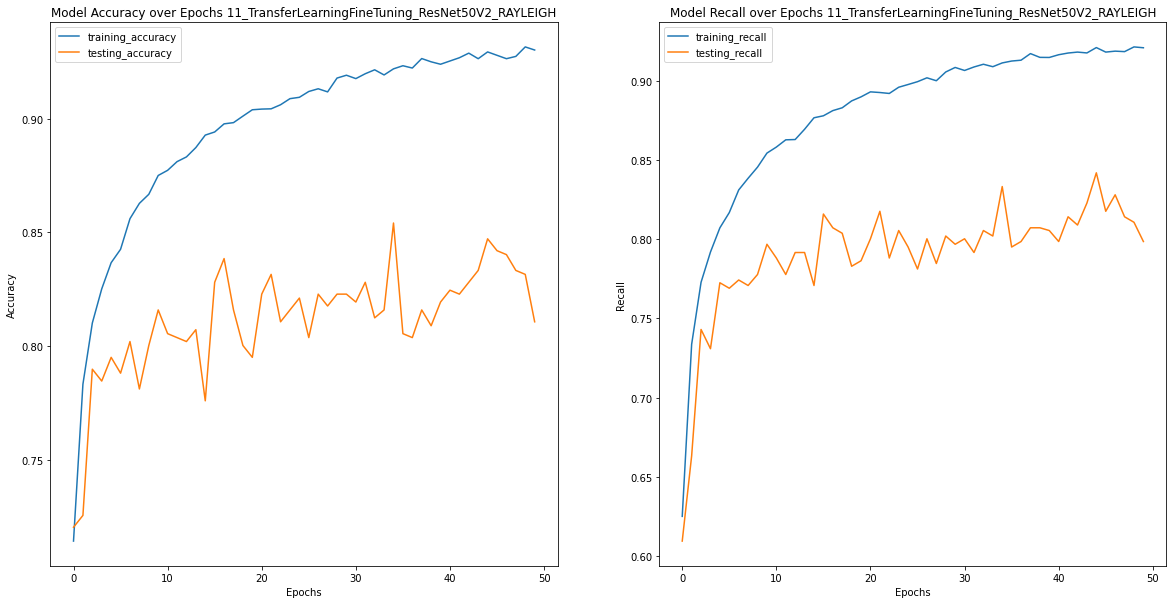

In [7]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/classificationReport/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/history/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.npy"
save_history1(TransferLearningFineTuning_ResNet50V2_RAYLEIGH_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH", location = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/history/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")

### 11_TransferLearningFineTuning_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create MobileNetV1 and train
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_MobileNetV1_NORMAL.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
TransferLearningFineTuning_MobileNetV1_NORMAL_history = trainModel(TransferLearningFineTuning_MobileNetV1_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

17235968/17225924 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                            

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


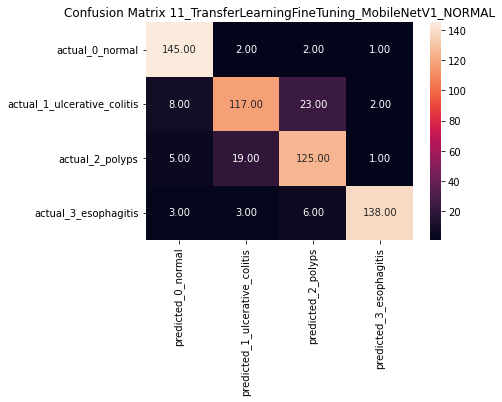

In [10]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV1_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV1_NORMAL, test_data, "11_TransferLearningFineTuning_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/results/confusionMatrix/11_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")

INFO:tensorflow:Assets written to: ram://50322200-9f20-47ca-84d2-6cb67dfdbb30/assets


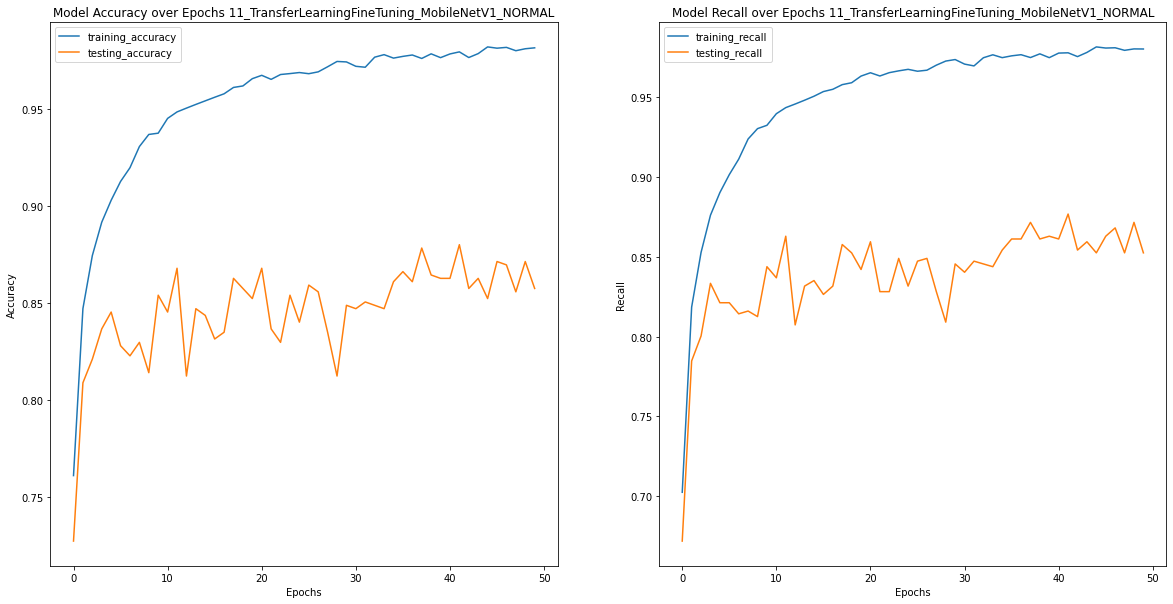

In [11]:
# Save results
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/results/classificationReport/11_TransferLearningFineTuning_MobileNetV1_NORMAL.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/history/11_TransferLearningFineTuning_MobileNetV1_NORMAL.npy"
save_history1(TransferLearningFineTuning_MobileNetV1_NORMAL_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_TransferLearningFineTuning_MobileNetV1_NORMAL", location = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/history/11_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")

### 11_TransferLearningFineTuning_MobileNetV2_NORMAL: Transfer Learning with MobileNetV2 model

#### Model Development and Training

In [12]:
# Create MobileNetV2 and train
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_MobileNetV2_NORMAL.summary()
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
TransferLearningFineTuning_MobileNetV2_NORMAL_history = trainModel(TransferLearningFineTuning_MobileNetV2_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

14548992/14536120 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                           

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


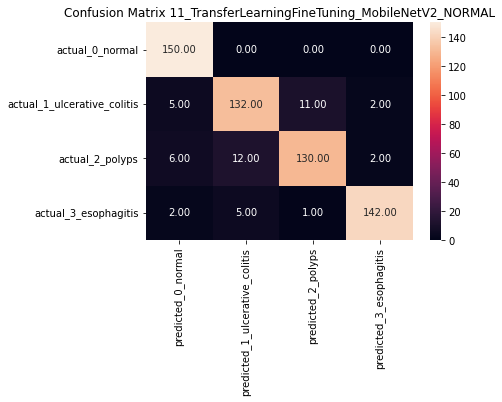

In [13]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV2_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV2_NORMAL, test_data, "11_TransferLearningFineTuning_MobileNetV2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/results/confusionMatrix/11_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")

INFO:tensorflow:Assets written to: ram://52d220d2-f99a-4bf1-81e3-bc742d1be5f2/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


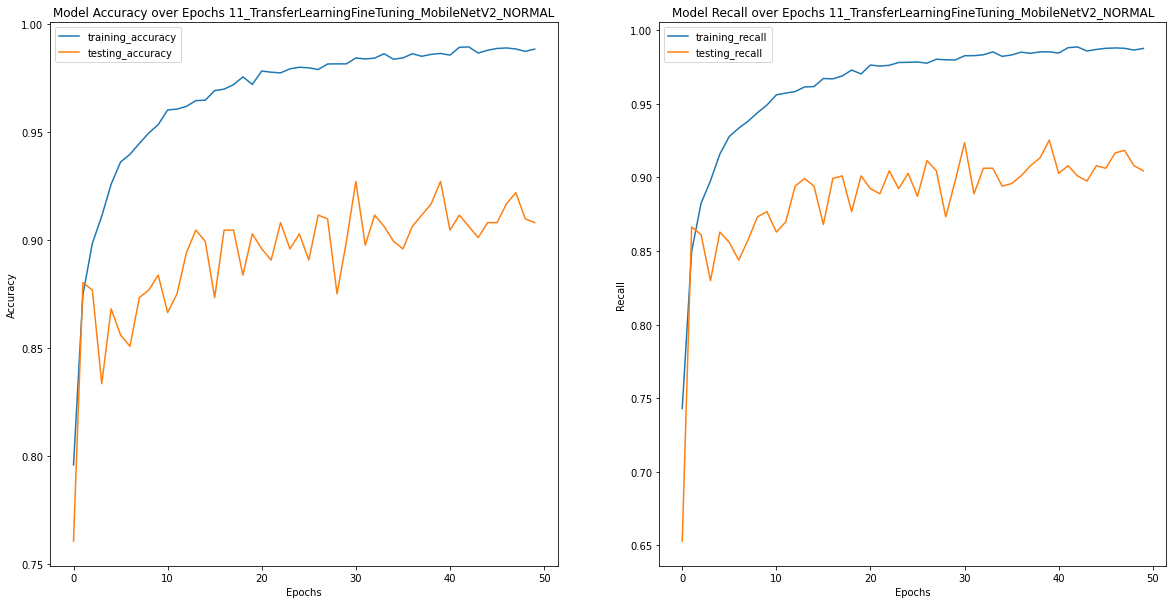

In [14]:
# Save results. 
saveResults_csv(df_results,"TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/results/classificationReport/11_TransferLearningFineTuning_MobileNetV2_NORMAL.csv")
historyPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/history/11_TransferLearningFineTuning_MobileNetV2_NORMAL.npy"
save_history1(TransferLearningFineTuning_MobileNetV2_NORMAL_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11_TransferLearningFineTuning_MobileNetV2_NORMAL", location = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/history/11_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")